<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.539568,30.111503,89.153273,-0.026857,188.777486,188.802523,-0.025037
1,0.0,1.0,98.393300,83.703019,94.094436,0.008500,286.199255,286.191843,0.007412
2,0.0,2.0,61.635434,48.366375,52.105886,-0.002150,172.105545,172.106745,-0.001199
3,0.0,3.0,24.133448,44.016335,94.745133,-0.001651,172.893266,172.893964,-0.000698
4,0.0,4.0,23.611482,50.060840,49.607761,0.001835,133.281917,133.279297,0.002619
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.196113,75.507688,22.066087,0.006503,187.776391,187.771416,0.004974
119996,999.0,116.0,87.010918,45.730349,76.407961,-0.004630,219.144599,219.148983,-0.004384
119997,999.0,117.0,56.141006,78.228085,22.995091,0.006405,167.370587,167.365177,0.005410
119998,999.0,118.0,94.477361,54.364680,91.287206,-0.008398,250.120850,250.129414,-0.008565


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.539568,30.111503,89.153273,-0.026857,188.777486,188.802523,-0.025037
1,0.0,1.0,98.393300,83.703019,94.094436,0.008500,286.199255,286.191843,0.007412
2,0.0,2.0,61.635434,48.366375,52.105886,-0.002150,172.105545,172.106745,-0.001199
3,0.0,3.0,24.133448,44.016335,94.745133,-0.001651,172.893266,172.893964,-0.000698
4,0.0,4.0,23.611482,50.060840,49.607761,0.001835,133.281917,133.279297,0.002619
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.196113,75.507688,22.066087,0.006503,187.776391,187.771416,0.004974
119996,999.0,116.0,87.010918,45.730349,76.407961,-0.004630,219.144599,219.148983,-0.004384
119997,999.0,117.0,56.141006,78.228085,22.995091,0.006405,167.370587,167.365177,0.005410
119998,999.0,118.0,94.477361,54.364680,91.287206,-0.008398,250.120850,250.129414,-0.008565


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.539568  30.111503  89.153273  ...  188.777486  188.802523 -0.025037
      1.0    98.393300  83.703019  94.094436  ...  286.199255  286.191843  0.007412
      2.0    61.635434  48.366375  52.105886  ...  172.105545  172.106745 -0.001199
      3.0    24.133448  44.016335  94.745133  ...  172.893266  172.893964 -0.000698
      4.0    23.611482  50.060840  49.607761  ...  133.281917  133.279297  0.002619
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  80.196113  75.507688  22.066087  ...  187.776391  187.771416  0.004974
      116.0  87.010918  45.730349  76.407961  ...  219.144599  219.148983 -0.004384
      117.0  56.141006  78.228085  22.995091  ...  167.370587  167.365177  0.005410
      118.0  94.477361  54.364680  91.287206  ...  250.120850  250.129414 -0.008565
      119.0  60.363235  39.817362  97.021617  ...  207.203322  207.200753  0.002569

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.539568  30.111503  89.153273  ...  188.777486  188.802523 -0.025037
      1.0    98.393300  83.703019  94.094436  ...  286.199255  286.191843  0.007412
      2.0    61.635434  48.366375  52.105886  ...  172.105545  172.106745 -0.001199
      3.0    24.133448  44.016335  94.745133  ...  172.893266  172.893964 -0.000698
      4.0    23.611482  50.060840  49.607761  ...  133.281917  133.279297  0.002619
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  80.196113  75.507688  22.066087  ...  187.776391  187.771416  0.004974
      116.0  87.010918  45.730349  76.407961  ...  219.144599  219.148983 -0.004384
      117.0  56.141006  78.228085  22.995091  ...  167.370587  167.365177  0.005410
      118.0  94.477361  54.364680  91.287206  ...  250.120850  250.129414 -0.008565
      119.0  60.363235  39.817362  97.021617  ...  207.203322  207.200753  0.002569

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.539568,30.111503,89.153273,-0.026857,188.777486,188.802523,-0.025037
1,0.0,1.0,98.393300,83.703019,94.094436,0.008500,286.199255,286.191843,0.007412
2,0.0,2.0,61.635434,48.366375,52.105886,-0.002150,172.105545,172.106745,-0.001199
3,0.0,3.0,24.133448,44.016335,94.745133,-0.001651,172.893266,172.893964,-0.000698
4,0.0,4.0,23.611482,50.060840,49.607761,0.001835,133.281917,133.279297,0.002619
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.196113,75.507688,22.066087,0.006503,187.776391,187.771416,0.004974
119996,999.0,116.0,87.010918,45.730349,76.407961,-0.004630,219.144599,219.148983,-0.004384
119997,999.0,117.0,56.141006,78.228085,22.995091,0.006405,167.370587,167.365177,0.005410
119998,999.0,118.0,94.477361,54.364680,91.287206,-0.008398,250.120850,250.129414,-0.008565


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.539568  30.111503  89.153273  ...  188.777486  188.802523 -0.025037
      1.0    98.393300  83.703019  94.094436  ...  286.199255  286.191843  0.007412
      2.0    61.635434  48.366375  52.105886  ...  172.105545  172.106745 -0.001199
      3.0    24.133448  44.016335  94.745133  ...  172.893266  172.893964 -0.000698
      4.0    23.611482  50.060840  49.607761  ...  133.281917  133.279297  0.002619
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  80.196113  75.507688  22.066087  ...  187.776391  187.771416  0.004974
      116.0  87.010918  45.730349  76.407961  ...  219.144599  219.148983 -0.004384
      117.0  56.141006  78.228085  22.995091  ...  167.370587  167.365177  0.005410
      118.0  94.477361  54.364680  91.287206  ...  250.120850  250.129414 -0.008565
      119.0  60.363235  39.817362  97.021617  ...  207.203322  207.200753  0.002569

[120000 rows x 7 columns]

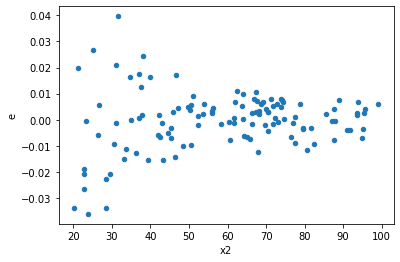

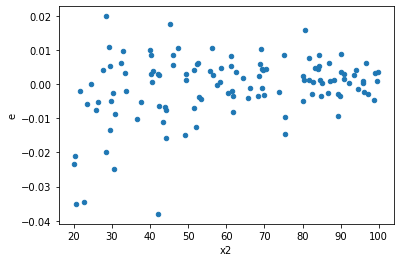

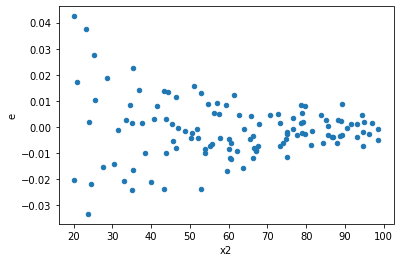

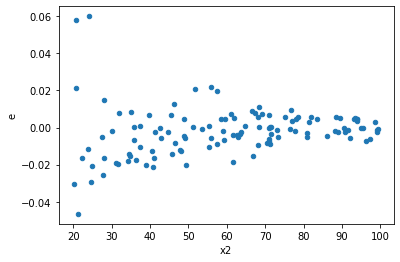

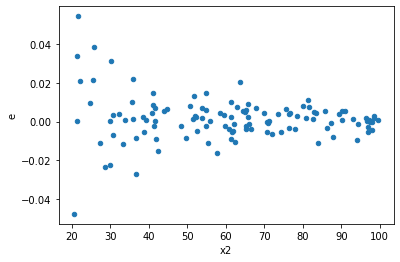

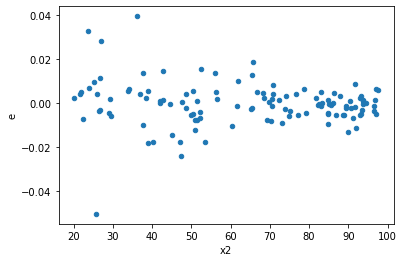

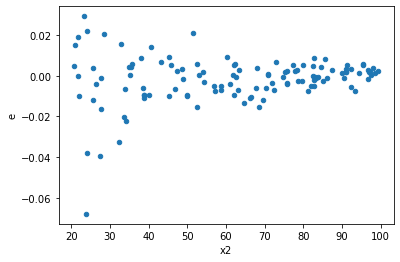

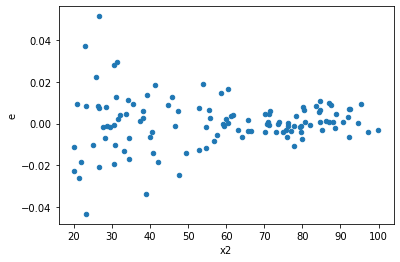

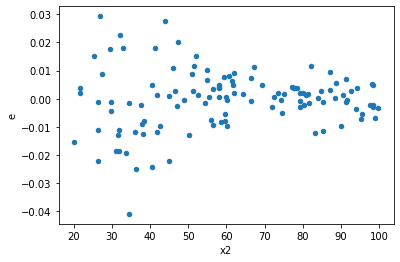

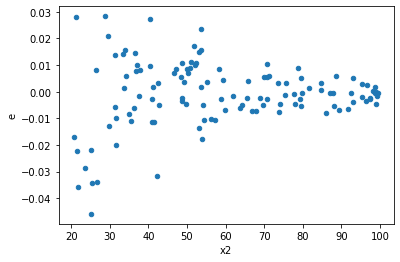

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.012099419378002529,0.001470773702527718,0.00026887598617783396,3.268386005617151e-05,0.12155737862939713,7.67970396961796e-11,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.018325620275238083,0.0012451386785131832,0.0004072360061164018,2.766974841140407e-05,0.06794524058733431,1.3013865952108854e-15,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.010695118475509312,0.0009399105621394289,0.0002376692994557625,2.08869013808762e-05,0.08788220198698356,1.9211648610112816e-13,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.008259056643014118,0.0014269755297289417,0.0001835345920669804,3.171056732730982e-05,0.17277706055399703,3.095342193672534e-08,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.00985797860937103,0.0010192563690900238,0.0002190661913193562,2.2650141535333863e-05,0.10339405363703215,4.0554187333044395e-12,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.010724459413041232,0.0012176229675298976,0.00023832132028980515,2.7058288167331056e-05,0.11353700178577161,2.249083241451133e-11,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.009110785450541534,0.0009450848089691301,0.000202461898900923,2.1001884643758446e-05,0.10373252823256367,4.3078149465319415e-12,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.009757569130915838,0.0012183129212899357,0.00021683486957590751,2.7073620473109683e-05,0.1248582413246593,1.237196353033972e-10,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.011610063709078081,0.0014072236953208191,0.0002580014157572907,3.127163767379598e-05,0.12120723284407907,7.294078921553183e-11,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64